# PROJECT #

## Setting Up the Data ##

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import json

In [2]:
# (need to pip install matplotlib_venn)
from matplotlib_venn import venn2

In [3]:
businesses = []
with open("yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json", "r") as json_file:
    for line in json_file:
        businesses += [json.loads(line)]

In [4]:
businessdf = pd.DataFrame(businesses)
businessdf.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{u'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{u'Thursday': {u'close': u'17:00', u'open': u'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,9,3.5,AZ,business
1,"{u'Happy Hour': True, u'Accepts Credit Cards':...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350519,-79.886930,Clancy's Pub,[],True,4,3.5,PA,business
2,{u'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.356896,-80.015910,Cool Springs Golf Center,[],False,5,2.5,PA,business
3,{},HZdLhv6COCleJMo7nPl-RA,"[Shopping, Home Services, Internet Service Pro...",Pittsburgh,"301 S Hills Vlg\nPittsburgh, PA 15241","{u'Monday': {u'close': u'21:00', u'open': u'10...",40.357620,-80.059980,Verizon Wireless,[],True,3,3.5,PA,business
4,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.408735,-79.866351,Emil's Lounge,[],True,11,4.5,PA,business


### Splitting Up By City ###

In [115]:
grouped = businessdf.groupby("state")
states = grouped.count().business_id
states

state
AZ     25230
BW       934
CA         3
EDH     2971
ELN       10
FIF        4
HAM        1
IL       627
KHL        1
MA         1
MLN      123
MN         1
NC      4963
NTH        1
NV     16485
NW         1
ON       351
OR         1
PA      3041
QC      3921
RP        13
SC       189
SCB        3
WA         1
WI      2307
XGL        1
Name: business_id, dtype: int64

### Choosing Which Categories to Use ###

In [5]:
# Get the number and indexes of restaurants in each category
ccounts = {}
csets = {}
for i, clist in businessdf.categories.iterkv():
    for c in clist:
        if c not in ccounts.keys():
            ccounts[c] = 1
            csets[c] = set([i])
        else:
            ccounts[c] += 1
            csets[c].update([i])

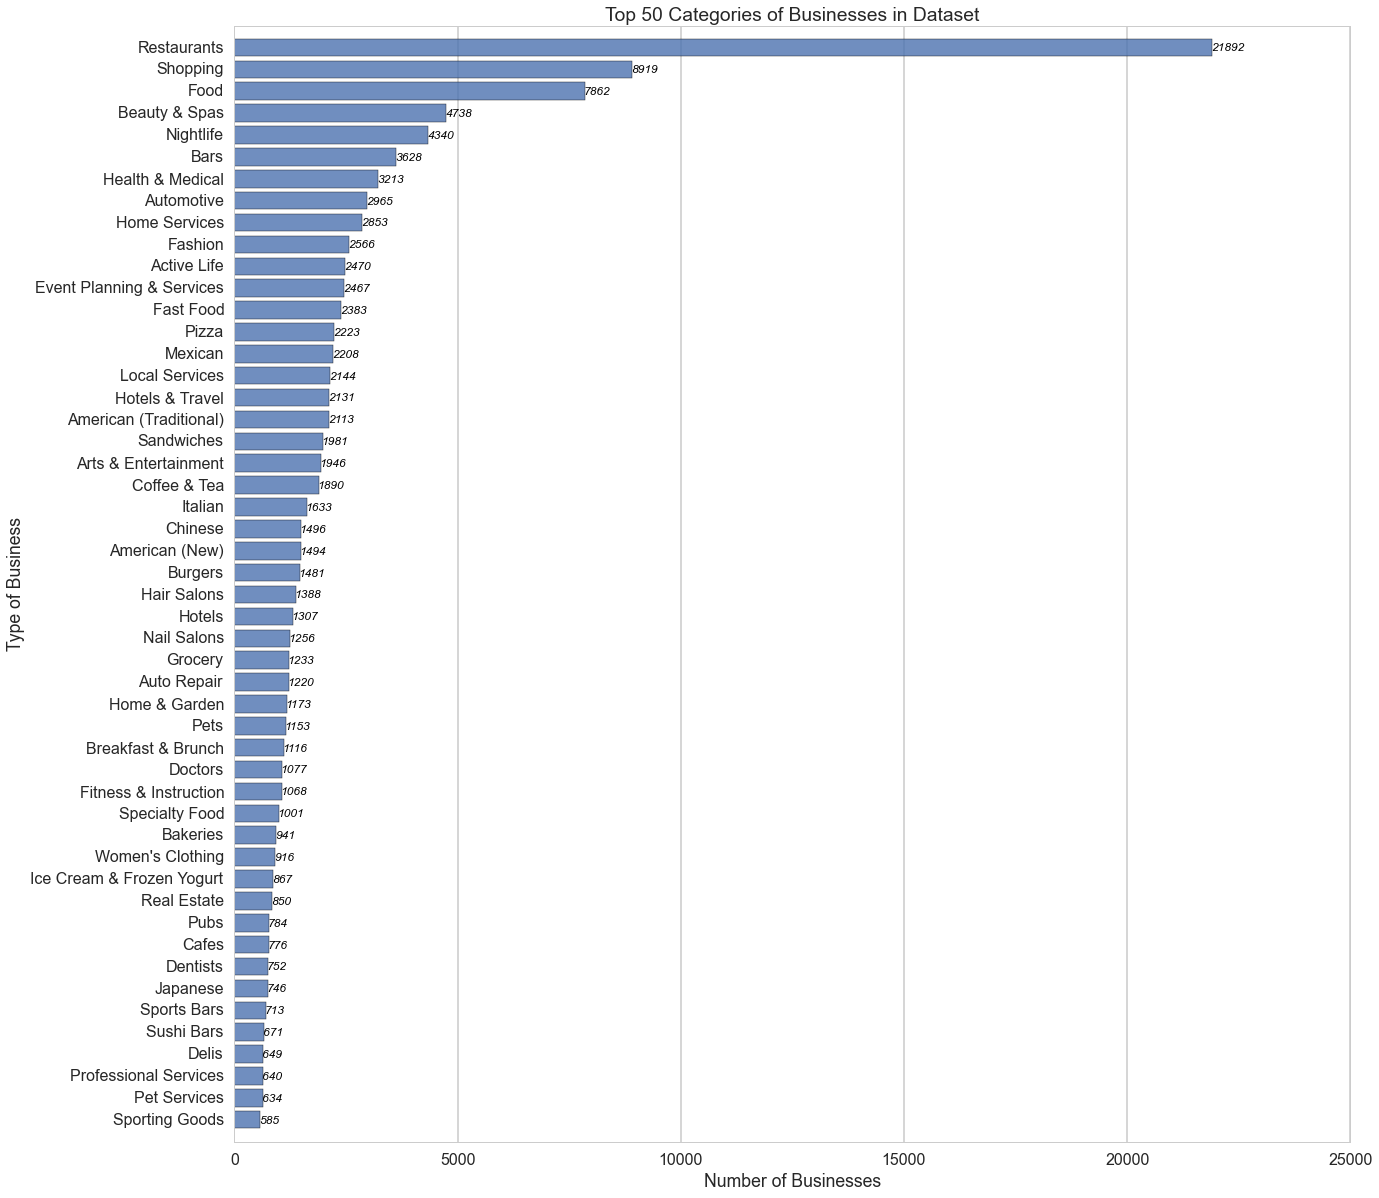

In [118]:
# Get the top categories
top_num = 50
top = sorted(ccounts.items(), key=lambda x:x[1], reverse = True)[:top_num]
top = sorted(top, key = lambda x:x[1])
Y = np.arange(len(top))
bars = plt.barh(Y, map(lambda x:x[1], top), align = 'center', alpha = 0.8)
plt.yticks(Y, map(lambda x:x[0], top))
plt.ylim(-1, top_num)
plt.xlabel("Number of Businesses")
plt.ylabel("Type of Business")
plt.title("Top " + str(top_num) +  " Categories of Businesses in Dataset")
plt.grid(b=None, axis='y')
plt.gcf().set_size_inches(20, 20)
font = {'color':  'black','size': 12}
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + 0.25, bar.get_width(), fontdict=font, style='italic')
plt.show()

In [7]:
cstouse = ['Restaurants',
           'Shopping',
           'Food', 
           'Beauty & Spas',
           'Nightlife',
           'Bars',
           'Health & Medical',
           'Automotive',
           'Home Services',
           'Fashion',
           'Active Life',
           'Event Planning & Services',
           'Hotels & Travel',
           'Arts & Entertainment',
           'Coffee & Tea',
          ]

In [8]:
# Get the size of intersections between different categories
from itertools import combinations

intersections = {}
for b1, b2 in combinations(cstouse, 2):
    intersections[(b1, b2)] = len(set.intersection(csets[b1], csets[b2]))

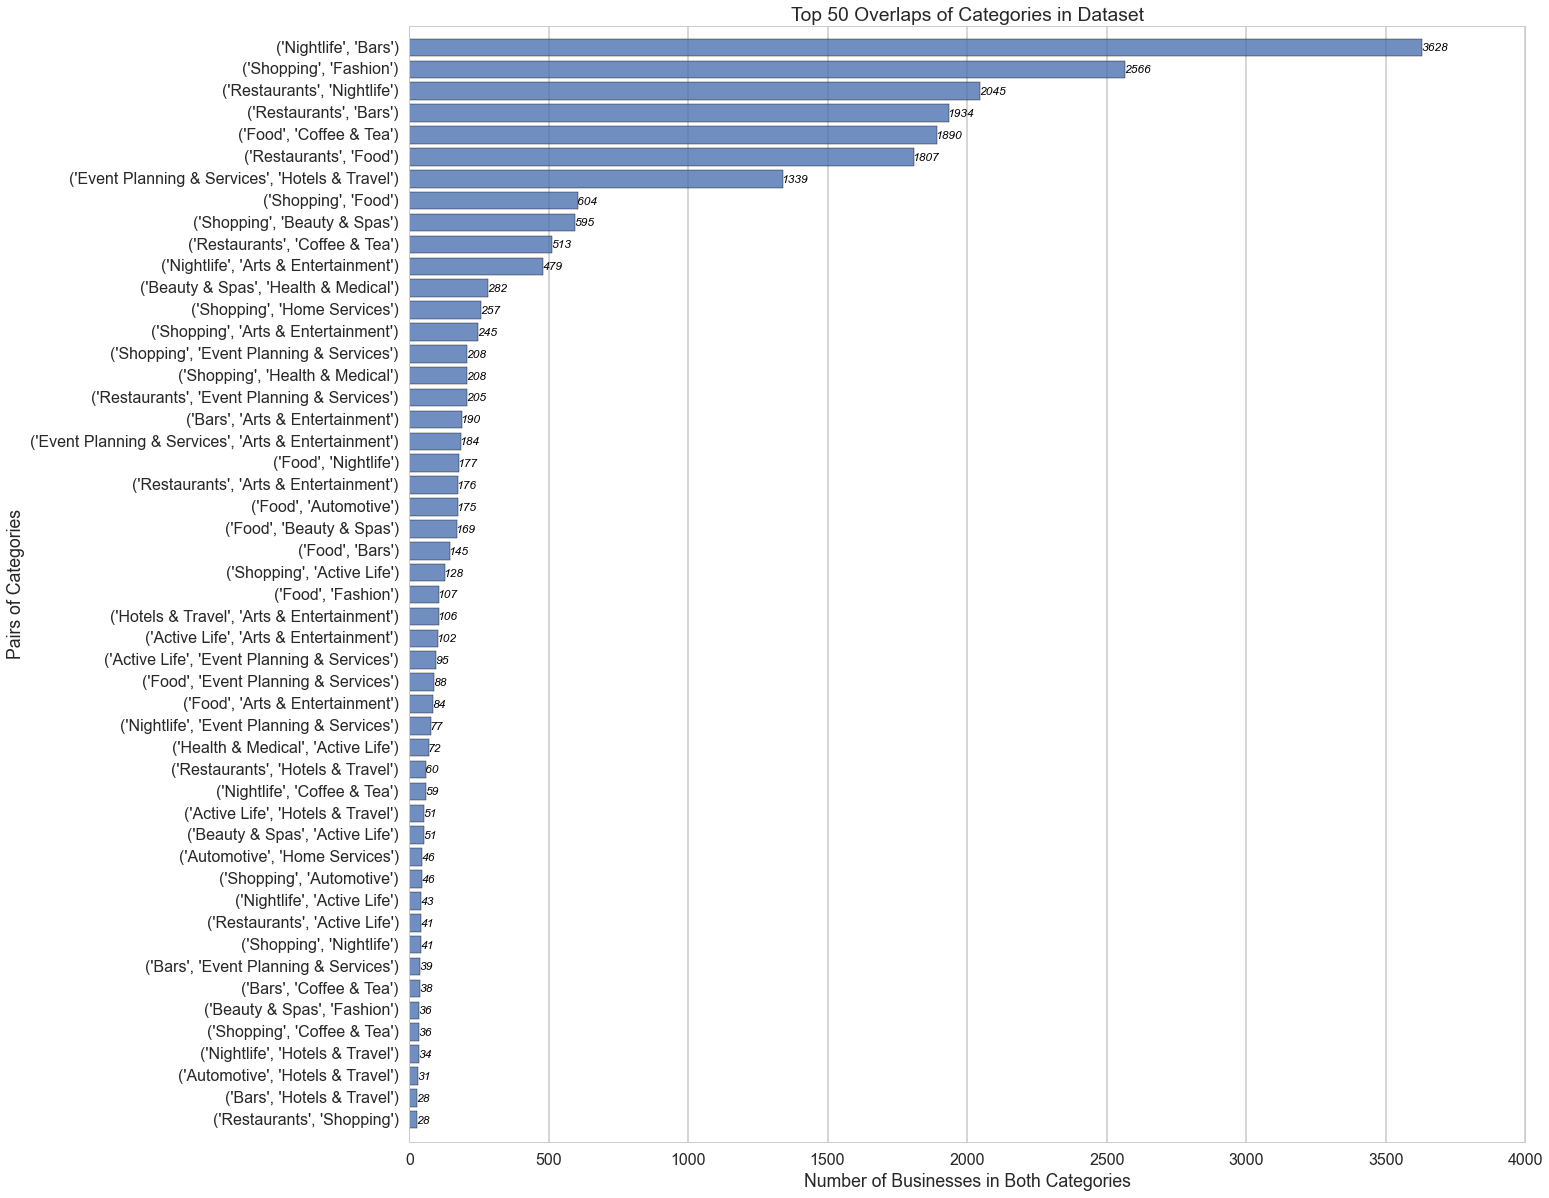

In [85]:
top_is = 50
sorted_is = sorted(intersections.items(), key=lambda x:x[1], reverse = True)[:top_is]
sorted_is.reverse()
Y = np.arange(len(sorted_is))
bars = plt.barh(Y, map(lambda x:x[1], sorted_is), align = 'center', alpha = 0.8)
plt.yticks(Y, map(lambda x:x[0], sorted_is))
plt.ylim(-1, len(sorted_is))
plt.xlabel("Number of Businesses in Both Categories")
plt.ylabel("Pairs of Categories")
plt.title("Top " + str(top_is) +  " Overlaps of Categories in Dataset")
plt.grid(b=None, axis='y')
plt.gcf().set_size_inches(20, 20)
font = {'color':  'black','size': 12}
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + 0.25, bar.get_width(), fontdict=font, style='italic')
plt.show()

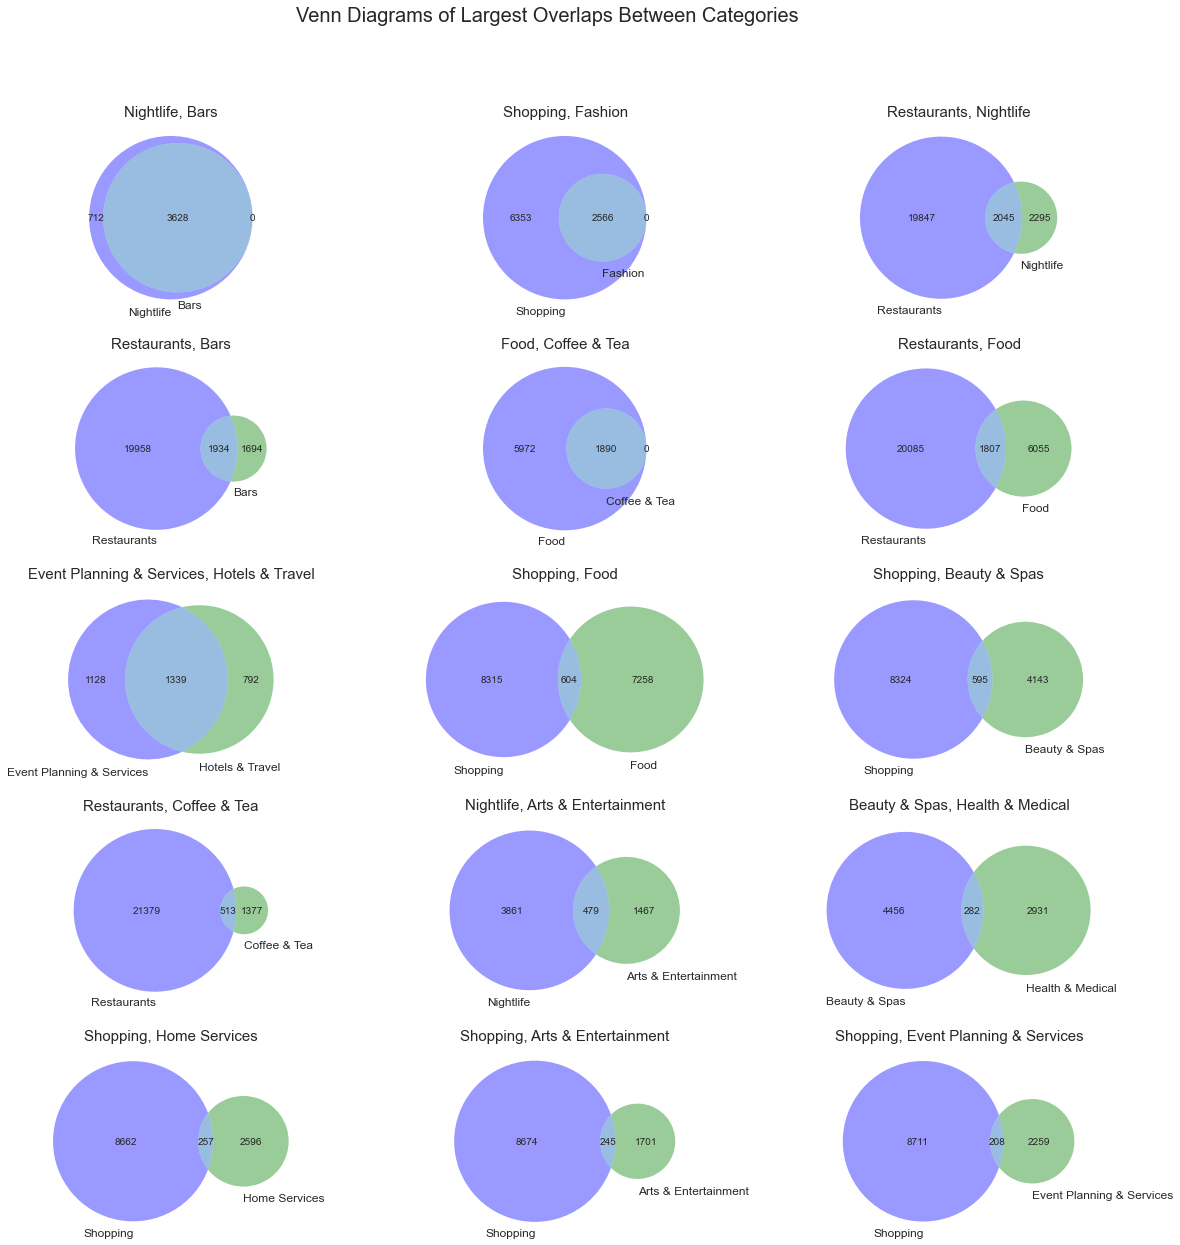

In [116]:
fig, axes = plt.subplots(nrows = 5, ncols=3, figsize=(20,20))
top15=sorted_is[-15:]
top15.reverse()
for ax, pair in zip(axes.ravel(), map(lambda x:x[0], top15)):
    venn2([csets[pair[0]], csets[pair[1]]], set_labels=pair, ax=ax, set_colors=['blue', 'green'])
    ax.set_title(pair[0] + ", " + pair[1], fontsize=15)
fig.suptitle("Venn Diagrams of Largest Overlaps Between Categories", fontsize = 20)
plt.show()

In [4]:
# make df of only restaurants
restdf = businessdf[["Restaurants" in category for category in businessdf.categories]]
restdf.reset_index(inplace = True, drop = True)
print restdf.shape
restdf.head()

(21892, 15)


,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.408735,-79.866351,Emil's Lounge,[],True,11,4.5,PA,business
1,"{u'Alcohol': u'full_bar', u'Noise Level': u'lo...",KayYbHCt-RkbGcPdGOThNg,"[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106",{},40.415517,-80.067534,Alexion's Bar & Grill,[Greentree],True,15,4.0,PA,business
2,"{u'Take-out': True, u'Drive-Thru': False, u'Ou...",wJr6kSA5dchdgOdwH6dZ2w,"[Burgers, Breakfast & Brunch, American (Tradit...",Carnegie,"2100 Washington Pike\nCarnegie, PA 15106","{u'Monday': {u'close': u'02:00', u'open': u'08...",40.387732,-80.092874,Kings Family Restaurant,[],True,8,3.5,PA,business
3,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...",fNGIbpazjTRdXgwRY_NIXA,"[Bars, American (Traditional), Nightlife, Loun...",Carnegie,"1201 Washington Ave\nCarnegie, PA 15106",{},40.396469,-80.084942,Rocky's Lounge,[],True,5,4.0,PA,business
4,"{u'Alcohol': u'none', u'Noise Level': u'averag...",b9WZJp5L1RZr4F1nxclOoQ,"[Breakfast & Brunch, Restaurants]",Carnegie,"1073 Washington Ave\nCarnegie, PA 15106","{u'Monday': {u'close': u'14:30', u'open': u'06...",40.396744,-80.084800,Gab & Eat,[],True,38,4.5,PA,business


## Exploratory Data Analysis##


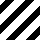
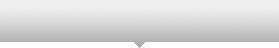
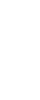
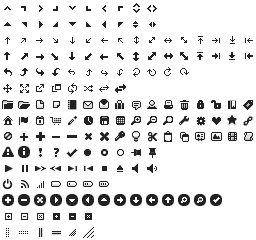
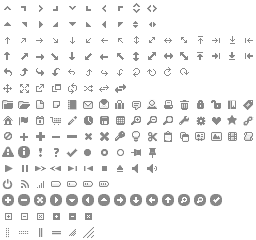
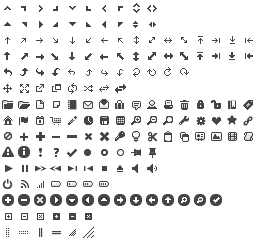
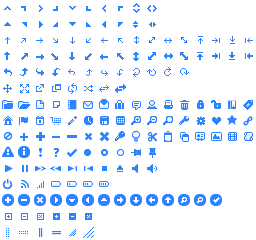
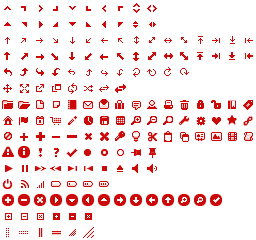
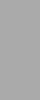
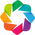
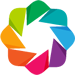
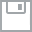
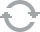
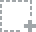
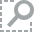
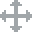
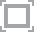
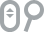

In [5]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import RdYlBu9 as palette
output_notebook()

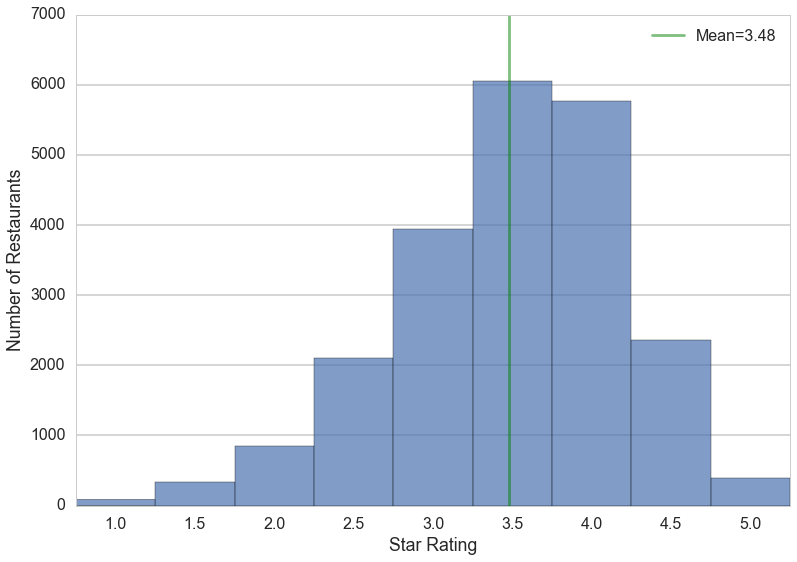

In [6]:
plt.hist(restdf.stars, bins = np.arange(1.0,6.0,0.5), alpha = 0.7)
plt.xticks(np.arange(1.25, 5.75, 0.5), np.arange(1.0,5.5, 0.5))
plt.axvline(restdf.stars.mean() + 0.25, color='g', label='Mean='+str(restdf.stars.mean())[:4], alpha = 0.5)
plt.legend()
plt.grid(axis = 'x')
plt.xlabel("Star Rating")
plt.ylabel("Number of Restaurants")
plt.show()

In [7]:
def color(x):
    return palette[(2*x - 2)]

In [8]:
AZdf = restdf[restdf.state == 'AZ'].reindex()
AZdf['color'] = AZdf.stars.map(lambda x: color(int(x)))
AZdf.head()

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,color
726,"{u'Take-out': True, u'Accepts Credit Cards': T...",x5Mv61CnZLohZWxfCVCPTQ,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,"2819 N Central Ave\nPhoenix, AZ 85004",{},33.479542,-112.073418,Domino's Pizza,[],True,11,3.0,AZ,business,#ffffbf
727,"{u'Take-out': True, u'Noise Level': u'quiet', ...",2ZnCITVa0abGce4gZ6RhIw,"[American (New), Sandwiches, Restaurants]",Phoenix,"1850 N Central Ave\nPhoenix, AZ 85004",{},33.468988,-112.074315,Viad Tower Restaurants,[],True,5,3.5,AZ,business,#ffffbf
728,"{u'Alcohol': u'full_bar', u'Price Range': 1, u...",EmzaQR5hQlF0WIl24NxAZA,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,"132 E Washington St\nPhoenix, AZ 85004","{u'Sunday': {u'close': u'02:00', u'open': u'21...",33.448399,-112.071702,Sky Lounge,[],True,23,2.5,AZ,business,#abd9e9
729,"{u'Take-out': True, u'Accepts Credit Cards': T...",KPoTixdjoJxSqRSEApSAGg,"[Thai, Restaurants]",Phoenix,"2631 N Central Ave\nPhoenix, AZ 85004","{u'Monday': {u'close': u'21:00', u'open': u'11...",33.477934,-112.073524,Wild Thaiger,[],True,322,4.0,AZ,business,#fdae61
730,"{u'Alcohol': u'full_bar', u'Open 24 Hours': Fa...",e5kc0CQ4R-PCCDgb274gSg,"[Mexican, Tex-Mex, Restaurants]",Phoenix,"455 N 3rd St\nSte 114\nPhoenix, AZ 85004","{u'Monday': {u'close': u'21:00', u'open': u'11...",33.452603,-112.069119,Canyon Cafe,[],True,191,3.5,AZ,business,#ffffbf


/Users/alexandergoldberg/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


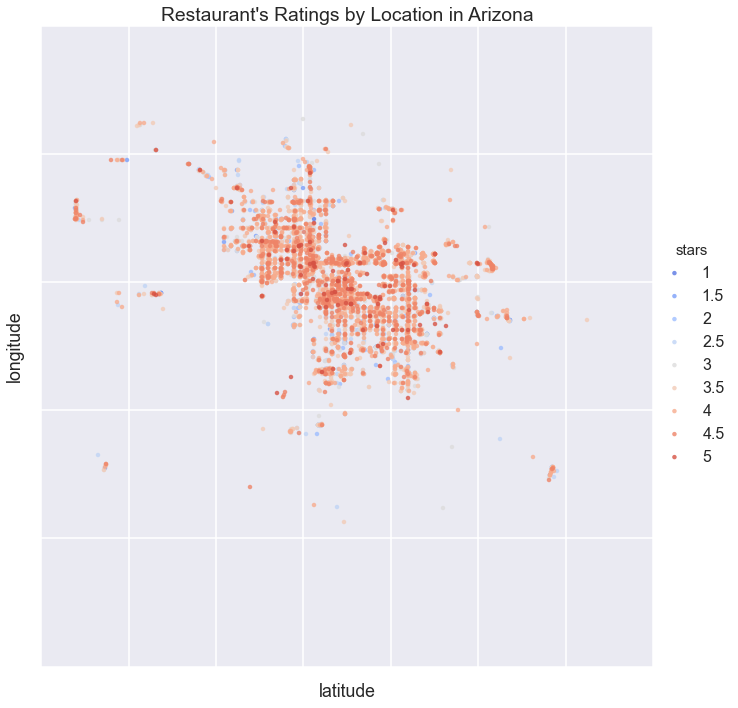

In [9]:
with sns.axes_style("darkgrid"), sns.color_palette("coolwarm", 9):
    plot = sns.lmplot("latitude", "longitude", hue = "stars", hue_order=[1,1.5,2,2.5,3,3.5,4,4.5,5], 
               data = AZdf, fit_reg=False, size = 10)
    axis = plot.axes[0][0]
    axis.set_title("Restaurant's Ratings by Location in Arizona")
    # zoom in on part of plot
#     axis.set_ylim(-111.8, - 111.6)
#     axis.set_xlim(33.3, 33.4)

    # remove labels
    axis.set_yticklabels([])
    axis.set_xticklabels([])
    sns.despine()

In [10]:
p = figure(title = 'AZ Star Ratings')
p.circle(AZdf.longitude, AZdf.latitude, color = AZdf.color)
show(p)

## Obtaining and Cleaning the Data ##

### Finding Neighbors ###

In [11]:
# build a Ball Tree to store all restaurants based on geographical location
from sklearn.neighbors import BallTree
# convert latitude and longitude to radians
to_r = 0.0174533
lat = restdf.latitude.map(lambda l : to_r * l)
lon = restdf.longitude.map(lambda l : to_r * l)
# dictionary with keys business id's and values (latitude, longitude)
latlng = dict(zip(restdf.business_id, zip(lat, lon)))
# use haversine distance for distance on sphere
tree = BallTree(latlng.values(), metric = 'haversine')

In [12]:
bids = np.array(latlng.keys())

# find the k nearest restaurants to a restaurant based on geographical location
def knearest(b_id, k):
    # radius of the earth in miles
    R = 3959 
    # get k closest neighbors
    d, ind = tree.query(latlng[b_id], k = k + 1)
    # scale the distance by earth's radius to get miles
    dist = d[0] * R
    ind = ind[0]
    neighbors = {}
    # exclude the restaurant we are querying
    ids = bids[ind]
    i = np.where(ids == b_id)
    neighbors["dist"] = np.delete(dist, i)
    neighbors["neighbors"] = np.delete(ids, i)
    return neighbors

In [13]:
%%time
# build dict of k nearest restaurants with keys restaurants and values list of tuples (rest, distance)
nearest = {}
k = 10
for bid in restdf.business_id:
    nearest[bid] = knearest(bid, k)

CPU times: user 4.18 s, sys: 96.9 ms, total: 4.28 s
Wall time: 4.41 s


In [14]:
bindexed = restdf.set_index("business_id")

# make a dataframe of the neighbors with distances (to check) for a given business id 'b'
def make_neighborsdf(b_id):
    neighbors = bindexed.loc[[b] + nearest[b_id]["neighbors"].tolist()]
    neighbors["distance"] = [0] + nearest[b_id]["dist"].tolist()
    return neighbors

In [15]:
b = restdf.business_id[0]
make_neighborsdf(b)

,attributes,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,distance
business_id,,,,,,,,,,,,,,,
mVHrayjG3uZ_RLHkLj-AMg,"{u'Alcohol': u'full_bar', u'Noise Level': u'av...","[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{u'Tuesday': {u'close': u'19:00', u'open': u'1...",40.408735,-79.866351,Emil's Lounge,[],True,11,4.5,PA,business,0.000000
IS9ZqBV6R0olC_OYv-vGjQ,"{u'Take-out': True, u'Price Range': 2, u'Outdo...","[Chinese, Restaurants]",Pittsburgh,"268 Yost Blvd\nPittsburgh, PA 15221",{},40.414032,-79.850650,Zhen Choo Chinese Restaurant,[],True,4,4.0,PA,business,0.903508
4mNRylz5SZZ-dhJOLmfkBg,"{u'Take-out': True, u'Accepts Credit Cards': T...",[Restaurants],Pittsburgh,"2104 Ardmore Blvd\nPittsburgh, PA 15221","{u'Monday': {u'close': u'23:00', u'open': u'11...",40.419454,-79.850259,Roman Bistro,[],True,39,3.0,PA,business,1.124839
Tq7ZVUvqRP7YPLwVfdKwTg,"{u'Take-out': True, u'Accepts Credit Cards': T...","[Breakfast & Brunch, Pizza, Diners, Restaurants]",Pittsburgh,"2060 Ardmore Blvd\nPittsburgh, PA 15221","{u'Monday': {u'close': u'21:00', u'open': u'06...",40.420456,-79.851394,Drew's Family Restaurant,[],True,30,4.0,PA,business,1.129198
GjbCtTIClnXdsJ8W3j8GZw,"{u'Take-out': False, u'Accepts Credit Cards': ...","[Burgers, American (Traditional), Sandwiches, ...",West Mifflin,"4800 Kennywood Blvd\nWest Mifflin, PA 15122",{},40.390315,-79.865458,Johnny Rockets,[],True,6,2.0,PA,business,1.273645
nKfKuPMl6jj1meN3QnmMFg,"{u'Take-out': True, u'Accepts Credit Cards': T...","[American (Traditional), Restaurants]",West Mifflin,"4800 Kennywood Blvd\nWest Mifflin, PA 15122","{u'Monday': {u'close': u'22:00', u'open': u'10...",40.390315,-79.865458,The Potato Patch,[],True,10,4.0,PA,business,1.273645
DzOPHyrG2XuVqKEvHCnN7w,"{u'Take-out': True, u'Accepts Credit Cards': F...","[Sandwiches, Restaurants]",Pittsburgh,"2122 Monongahela Ave\nPittsburgh, PA 15218","{u'Monday': {u'close': u'22:30', u'open': u'08...",40.417570,-79.887952,Triangle Bar & Grill,[],True,25,4.5,PA,business,1.290048
u22QDAON1kk0wjoTliyftw,"{u'Take-out': True, u'Parking': {u'garage': Fa...","[Pizza, Restaurants]",West Mifflin,"4426 Kennywood Blvd\nWest Mifflin, PA 15122",{},40.389192,-79.868305,Latina Pizza,[],True,3,4.0,PA,business,1.354285
nqRNOug4OMrYTTZg-qLxXA,"{u'Take-out': True, u'Alcohol': u'none', u'Cat...","[Pizza, Restaurants]",Swissvale,"7520 Washington St\nSwissvale, PA 15218",{},40.420972,-79.886521,Veltre's Pizza,[],True,5,4.0,PA,business,1.356807


## Baseline Model ##

We calculate a baseline prediction of the rating of a restaurant by taking the mean of the star ratings of its geographical neighbors.

We may also want to weight the star ratings of the other restaurants by distance from the restaurant we are trying to predict. Therefore, we calculate a weighted baseline, the weight $$w_i = 0.5^{distance} \log(\text{review count})$$ assuming that a restuarant a mile away is half as valuable as a restaurant located exactly where the restaurant we are predicting on is and weighting by the review count (which we log since it is severely right skewed).

In [16]:
# baseline (average of neighbors)
def baseline(bid):
    return bindexed.stars.loc[nearest[bid]["neighbors"]].mean()

In [17]:
# weighted baseline (weighted average of neighbors by distance)
def weighted_baseline(bid):
    ns = nearest[bid]["neighbors"]
    weights = 0.5**(nearest[bid]["dist"]) * np.log(bindexed.review_count.loc[ns])
    stars = bindexed.stars.loc[ns]
    return sum(stars*weights)/sum(weights)

In [18]:
%%time
# make the predictions (takes ~10 secs)
predictions = [baseline(b) for b in restdf.business_id]

CPU times: user 8.92 s, sys: 100 ms, total: 9.02 s
Wall time: 9.09 s


In [19]:
%%time
# make the weighted predictions (takes ~30 secs)
weighted_predictions = [weighted_baseline(b) for b in restdf.business_id]

CPU times: user 23.1 s, sys: 295 ms, total: 23.4 s
Wall time: 23.7 s


In [20]:
# get the RMS error (taken from Pset 4)
def get_rmse(s, s_predict):
    diff = s - s_predict
    return np.sqrt(np.dot(diff,diff)/diff.shape[0])

In [21]:
# graph the actual vs predicted (taken from Pset 4)
def compare_results(stars_actual, stars_predicted, ylow=1, yhigh=6, model="", predicteds=False, onsame=False, axis=False):
    """
    plot predicted results against actual results. Takes 2 arguments: a
    numpy array of actual ratings and a numpy array of predicted ratings
    scatterplots the predictions, a unit slope line, line segments joining the mean,
    and a filled in area of the standard deviations."
    """
    if onsame:
        ax=onsame
    elif axis:
        ax=axis
    else:
        fig=plt.figure()
        ax=plt.gca()
    df=pd.DataFrame(dict(actual=stars_actual, predicted=stars_predicted))
    xp=[]
    yp=[]
    for k,v in df.groupby('actual'):
        xp.append(k)
        yp.append(v.predicted.mean())        
    
    cl, = ax.plot(xp,yp, 's-', label="means for %s" % model)
    c=cl.get_color()

    sig=df.groupby('actual').predicted.std().values
    ax.fill_between(xp, yp - sig, yp + sig, 
                 color=c, alpha=0.2)
    if predicteds:
        ax.plot(df.actual, df.predicted, '.', color=c, alpha=0.1, label="predicted for %s" % model)

    if not onsame:
        ax.plot([1,5],[1,5], 'k', label="slope 1")
        ax.set_xlabel("actual")
        ax.set_ylabel("predicted")
        ax.set_ylim([ylow,yhigh])
        ax.set_xlim([0.9, 5.1])
    ax.legend(frameon=False, loc="upper left")
    rmse=get_rmse(stars_actual, stars_predicted)
    print "RMSE for %s" % model, rmse
    return ax,rmse

In [22]:
star_mean = restdf.stars.mean()
star_mean

3.480746391375845

In [23]:
means = np.ones(len(restdf.stars))*star_mean
get_rmse(restdf.stars, star_mean)

0.72733223367705968

RMSE for baseline 0.730270992562
RMSE for weighted baseline 0.727942144517


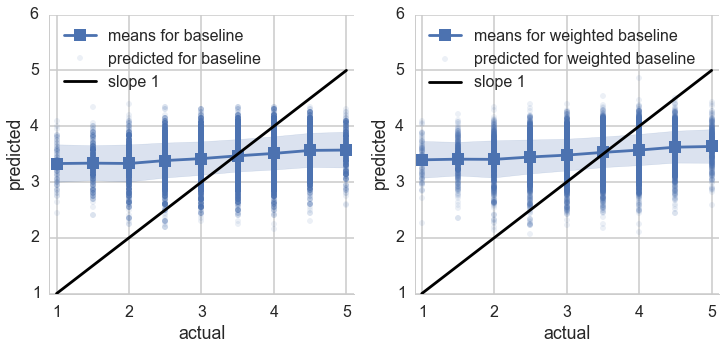

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
compare_results(restdf.stars, predictions, model = "baseline", predicteds = True, axis = axes[0])
compare_results(restdf.stars, weighted_predictions, model = "weighted baseline", predicteds = True, axis = axes[1])
sns.despine()